In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 8         | -0.2038   | 0.5357    | 6.119     | 8.514     |
| 16        | -0.2      | 0.08257   | 5.826     | 7.8       |
| 33        | -0.04309  | 0.7966    | 6.018     | 0.3056    |
| 49        | -0.03374  | 0.5687    | 5.754     | 0.3298    |
| 50        | -0.02278  | 0.5022    | 5.332     | 0.3555    |
Curve params found
{'push': 0.5021806878302055,
 'shift': 5.332274327615442,
 'slope': 0.3555307499283658}
-
## Chance of nonscaling delay ##


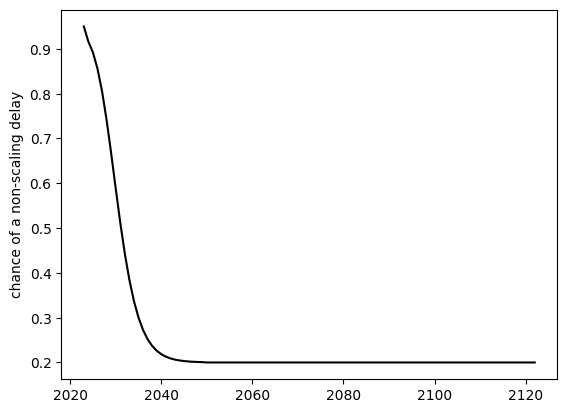

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 92%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 89%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 86%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 81%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 74%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 67%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 51%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 44%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.8),
                     (2030, 0.5),
                     (2035, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(3, 10)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.25     | 0.02348   | 3.7       | 5.026     |
| 33        | -0.2431   | 0.3518    | 8.839     | 1.66      |
| 44        | -0.0826   | 0.01      | 10.0      | 1.655     |
| 46        | -0.06136  | 0.01      | 10.0      | 1.587     |
| 48        | -0.02997  | 0.01      | 9.653     | 1.343     |
| 49        | -0.01632  | 0.01598   | 9.794     | 1.142     |
| 69        | -0.01457  | 0.07476   | 9.395     | 0.8897    |
Curve params found
{'push': 0.07475745701868669,
 'shift': 9.395047200250454,
 'slope': 0.8897364129564471}
-
## Chance of nonscaling delay ##


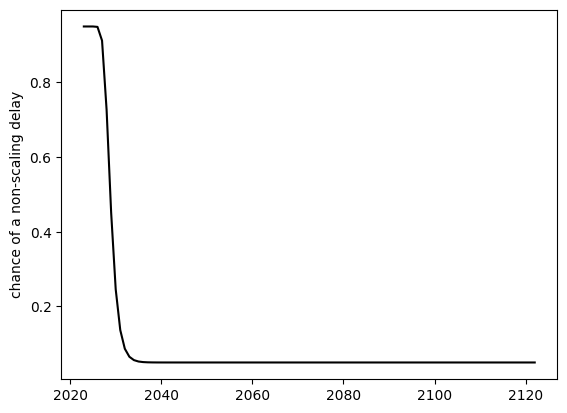

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 95%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 91%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 73%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 45%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2033 

In [3]:
nonscaling_points = [(2023, 0.95),
                     (2027, 0.9),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 10        | -0.0752   | 0.2522    | 4.174     | 8.913     |
| 41        | -0.075    | 0.01      | 6.655     | 7.297     |
| 48        | -0.075    | 0.01      | 5.902     | 4.994     |
| 54        | -0.075    | 0.01      | 4.307     | 4.556     |
| 58        | -0.075    | 0.07581   | 4.01      | 3.115     |
| 68        | -0.07474  | 0.01      | 3.577     | 1.738     |
| 94        | -0.07464  | 0.04208   | 9.983     | 1.629     |
Curve params found
{'push': 0.04207901533933115,
 'shift': 9.982872446931434,
 'slope': 1.6290441875075679}
-
## Chance of nonscaling delay ##


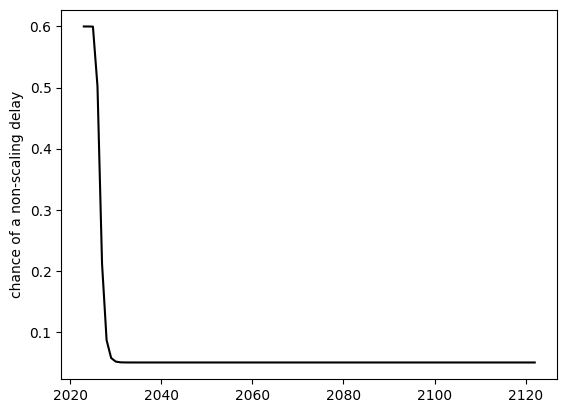

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 50%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - ch

In [4]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 8         | -0.04693  | 1.587     | 7.176     | 0.3225    |
| 30        | -0.04004  | 2.44      | 8.612     | 0.1563    |
Curve params found
{'push': 2.4401200661369398,
 'shift': 8.61214204691159,
 'slope': 0.15628490433968126}
-
## Chance of nonscaling delay ##


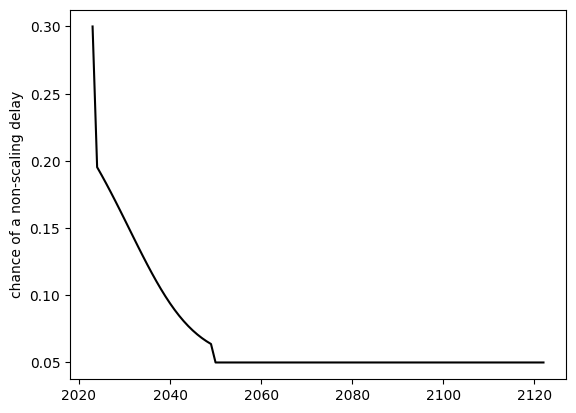

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2033

In [5]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(4, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.01686  | 0.4299    | 8.093     | 9.191     |
| 41        | -0.01667  | 0.01      | 10.0      | 4.301     |
| 43        | -0.01667  | 0.01      | 7.716     | 2.834     |
| 47        | -0.01648  | 0.01      | 6.752     | 0.6924    |
| 63        | -0.01548  | 0.01      | 7.715     | 1.424     |
| 79        | -0.006571 | 0.5773    | 7.546     | 0.4828    |
| 82        | -4.462e-0 | 0.1605    | 7.646     | 0.5969    |
Curve params found
{'push': 0.1604924145089154,
 'shift': 7.645643800148057,
 'slope': 0.5968690494430322}
-
## Chance of nonscaling delay ##


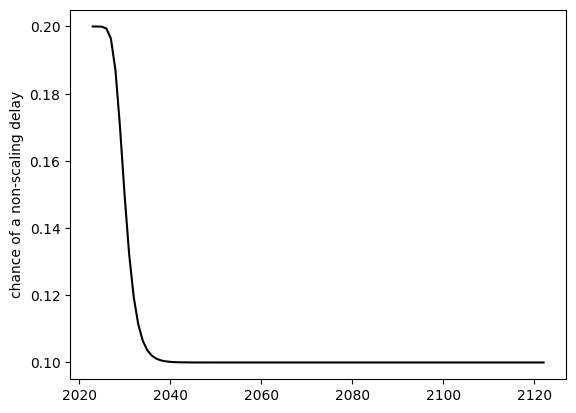

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 19%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2033

In [6]:
nonscaling_points = [(2023, 0.2),
                     (2030, 0.15),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.6, sq.lognorm(3, 10)],
                                                                                   [0.4, sq.lognorm(10, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 10        | -0.0383   | 0.788     | 6.735     | 6.492     |
| 28        | -0.038    | 0.4678    | 2.471     | 7.055     |
| 29        | -0.03453  | 0.561     | 8.523     | 6.424     |
| 31        | -0.03333  | 0.1016    | 8.541     | 6.298     |
| 42        | -0.03333  | 0.01      | 8.395     | 8.606     |
| 49        | -0.03333  | 0.01      | 2.486     | 4.961     |
| 50        | -0.03333  | 0.01      | 4.435     | 3.657     |
| 62        | -0.03328  | 0.01      | 4.524     | 1.892     |
| 92        | -0.03327  | 0.01      | 5.639     | 1.893     |
Curve params found
{'push': 0.01, 'shift': 5.639323864024375, 'slope': 1.8932131253006241}
-
## Chance of nonscaling delay ##


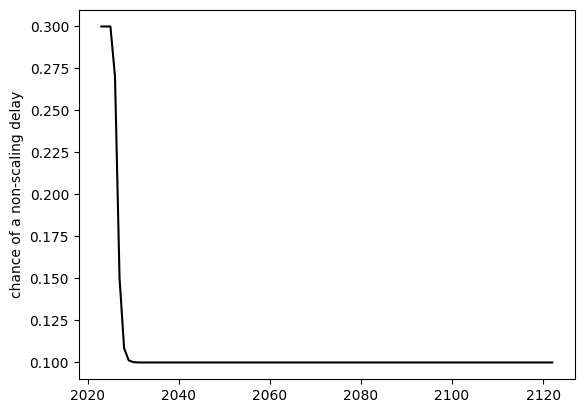

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 27%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [7]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.4),
                     (2050, 0.2),
                     (2080, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 5)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Save

In [8]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!
